In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator

In [2]:
data_weather = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
data_weather.head(10)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [3]:
print(f'Weather data shape is: {data_weather.shape}.')

Weather data shape is: (3650, 2).


In [4]:
data_weather['Date'] = pd.to_datetime(data_weather['Date'])
data_weather['Day'] = data_weather['Date'].dt.day
data_weather['Month'] = data_weather['Date'].dt.month
data_weather['Year'] = data_weather['Date'].dt.year
data_weather.describe()

,Date,Temp,Day,Month,Year
count,3650,3650.000000,3650.000000,3650.000000,3650.000000
mean,1985-12-31 07:12:00,11.177753,15.719452,6.520548,1985.500000
min,1981-01-01 00:00:00,0.000000,1.000000,1.000000,1981.000000
25%,1983-07-02 06:00:00,8.300000,8.000000,4.000000,1983.000000
50%,1985-12-31 12:00:00,11.000000,16.000000,7.000000,1985.500000
75%,1988-06-30 18:00:00,14.000000,23.000000,10.000000,1988.000000
max,1990-12-31 00:00:00,26.300000,31.000000,12.000000,1990.000000
std,NaN,4.071837,8.795673,3.447566,2.872675


In [5]:
data_weather.drop(['Date'], axis = 1, inplace = True)
data_weather.head()

,Temp,Day,Month,Year
0,20.7,1,1,1981
1,17.9,2,1,1981
2,18.8,3,1,1981
3,14.6,4,1,1981
4,15.8,5,1,1981


In [6]:
df_weth = data_weather[['Day', 'Month', 'Year', 'Temp']]
df_weth.head()

,Day,Month,Year,Temp
0,1,1,1981,20.7
1,2,1,1981,17.9
2,3,1,1981,18.8
3,4,1,1981,14.6
4,5,1,1981,15.8


In [7]:
len(set(df_weth['Year']))

10

In [8]:
df_weth['Year'].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990],
      dtype=int32)

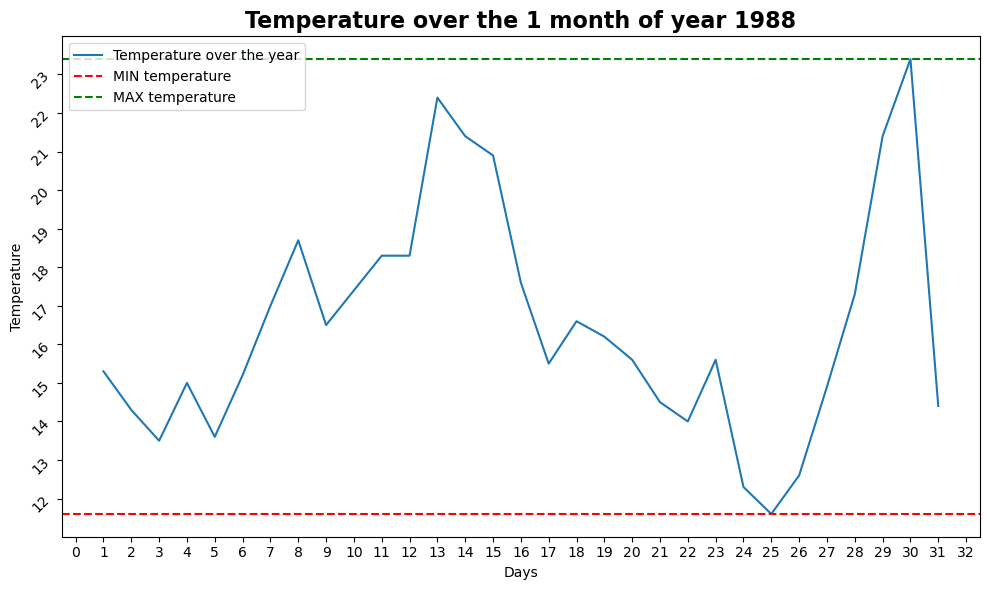

In [9]:
month = 1
year = 1988

df_1988_jan = df_weth[(df_weth['Year'] == year) & (df_weth['Month'] == month)]

fig, ax = plt.subplots(1,1, figsize = (10,6), dpi = 100)
plt.plot(df_1988_jan['Day'],df_1988_jan['Temp'], label = 'Temperature over the year')
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(rotation = 45, fontsize = 10)

plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title(f'Temperature over the {month} month of year {year}', fontweight = 'bold', fontsize = 16)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.axhline(min(df_1988_jan['Temp']), linestyle = '--', color = 'red', label = 'MIN temperature')
ax.axhline(max(df_1988_jan['Temp']), linestyle = '--', color = 'green', label = 'MAX temperature')

plt.tight_layout()
plt.legend(loc = 2)
plt.show()